ITEC 6720 Assignment #5
Chapter 6 - Customizing Visualizations 
Rachel Buchanan 

In [1]:
# setup 
#
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
#
quakes = pd.read_csv('data/earthquakes.csv')

In [2]:
# add reference lines
#
from stock_analysis import StockAnalyzer
#
fb_analyzer = StockAnalyzer(fb)

In [3]:
support, resistance = (
    getattr(fb_analyzer, stat)(level=3) for stat in ['support', 'resistance']
)
support, resistance

(124.4566666666667, 138.5266666666667)

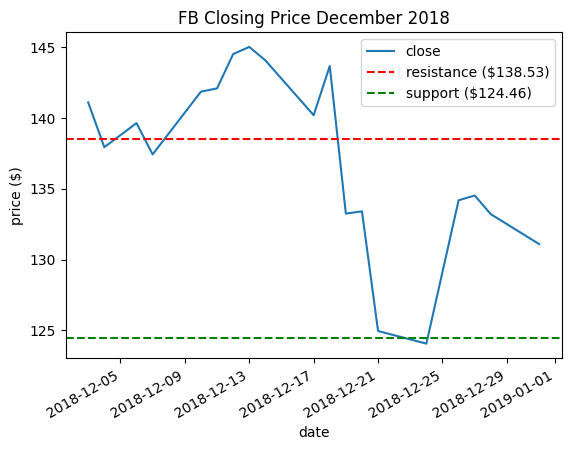

In [4]:
fb.close['2018-12'].plot(title='FB Closing Price December 2018')
plt.axhline(
    y=resistance, color='r', linestyle='--',
    label=f'resistance (${resistance:,.2f})'
)
plt.axhline(
    y=support, color='g', linestyle='--',
    label=f'support (${support:,.2f})'
)
plt.ylabel('price ($)')
plt.legend()

In [5]:
# vertical reference lines
#
from viz import std_from_mean_kde
std_from_mean_kde??

Signature: std_from_mean_kde(data)
Source:   
def std_from_mean_kde(data):
    """
    Plot the KDE along with vertical reference lines
    for each standard deviation from the mean.
    
    Parameters:
        - data: `pandas.Series` with numeric data
    
    Returns:
        Matplotlib `Axes` object.
    """
    mean_mag, std_mean = data.mean(), data.std()
    
    ax = data.plot(kind='kde')
    ax.axvline(mean_mag, color='b', alpha=0.2, label='mean')
    
    colors = ['green', 'orange', 'red']
    multipliers = [1, 2, 3]
    signs = ['-', '+']
    linestyles = [':', '-.', '--']
    
    for sign, (color, multiplier, style) in itertools.product(
        signs, zip(colors, multipliers, linestyles)
    ):
        adjustment = multiplier * std_mean
        if sign == '-':
            value = mean_mag - adjustment
            label = '{} {}{}{}'.format(
                r'$\mu$',
                r'$\pm$',
                multiplier,
                r'$\sigma$'
            )
        els

Text(0.5, 0, 'mb earthquake magnitude')

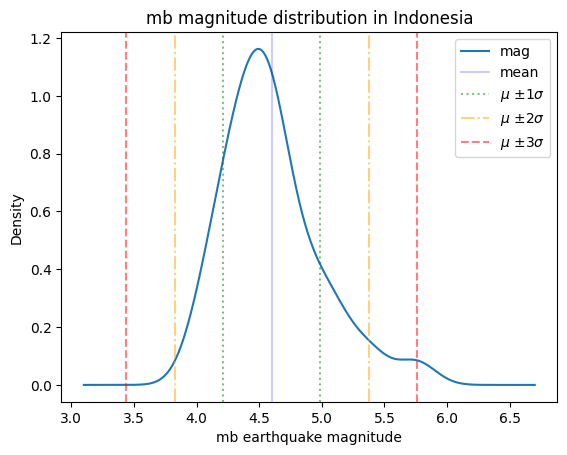

In [6]:
from viz import std_from_mean_kde
#
ax = std_from_mean_kde(
    quakes.query(
        'magType == "mb" and parsed_place == "Indonesia"'
    ).mag
)
ax.set_title('mb magnitude distribution in Indonesia')
ax.set_xlabel('mb earthquake magnitude')

Text(0, 0.5, 'Price ($)')

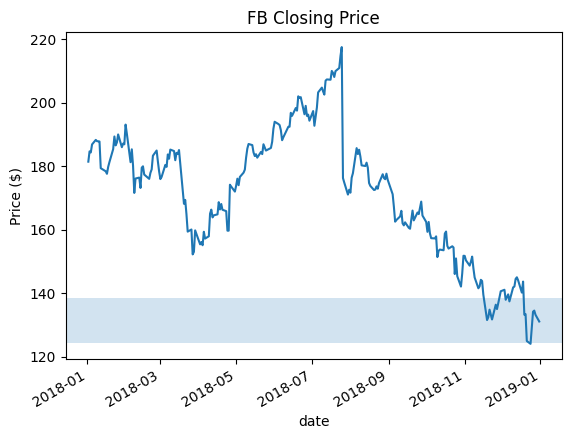

In [7]:
# shading 
#
ax = fb.close.plot(title='FB Closing Price')
ax.axhspan(support, resistance, alpha=0.2)
plt.ylabel('Price ($)')

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

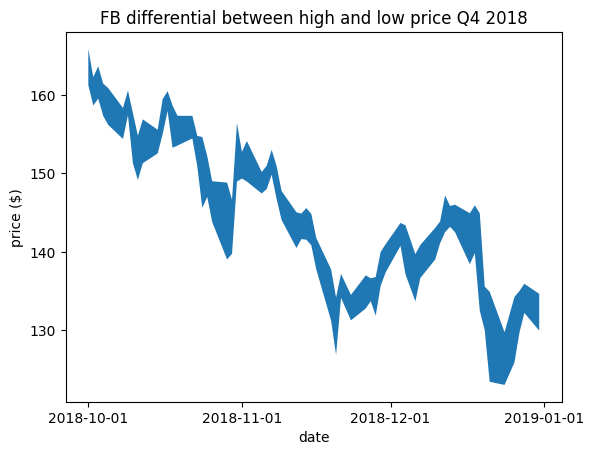

In [8]:
# fill between two curves
#
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4.high, fb_q4.low)
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.title('FB differential between high and low price Q4 2018')

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

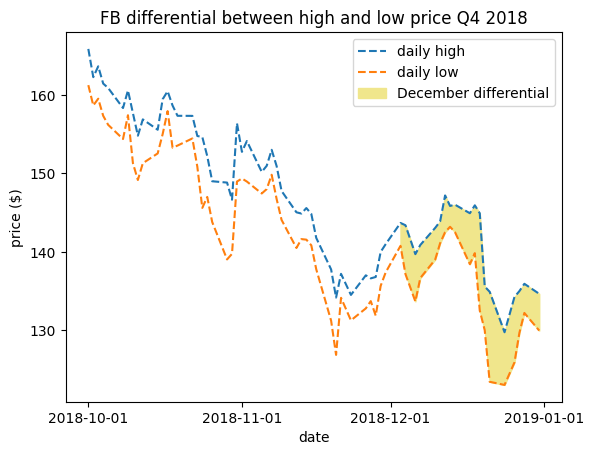

In [9]:
# specify range - where
#
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(
    fb_q4.index, fb_q4.high, fb_q4.low, 
    where=fb_q4.index.month == 12, 
    color='khaki', label='December differential'
)
plt.plot(fb_q4.index, fb_q4.high, '--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, '--', label='daily low')
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.legend()
plt.title('FB differential between high and low price Q4 2018')

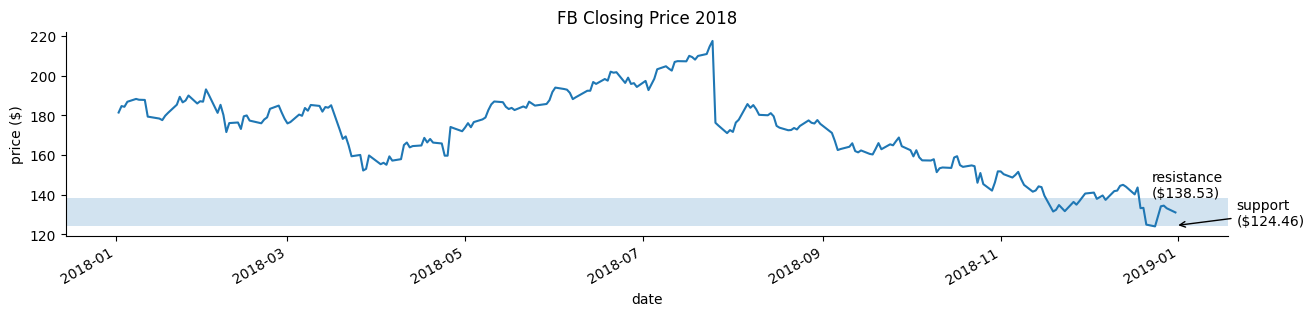

In [10]:
# annotations
#
ax = fb.close.plot(title='FB Closing Price 2018', figsize=(15, 3))
ax.set_ylabel('price ($)')
#
ax.axhspan(support, resistance, alpha=0.2)
#
plt.annotate(
    f'support\n(${support:,.2f})',
    xy=('2018-12-31', support),
    xytext=('2019-01-21', support),
    arrowprops={'arrowstyle': '->'}
)
plt.annotate(
    f'resistance\n(${resistance:,.2f})',
    xy=('2018-12-23', resistance)
)
# 
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

Text(0, 0.5, 'price ($)')

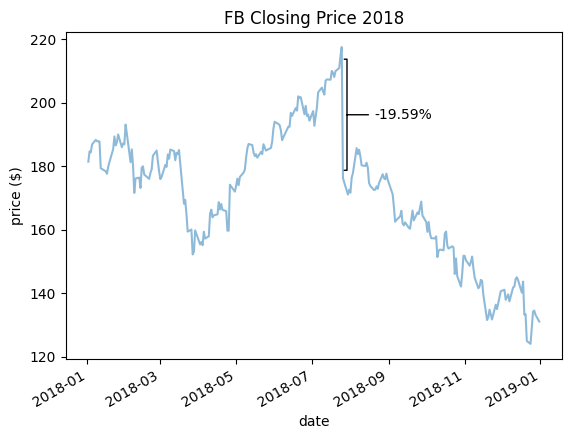

In [11]:
# arrow
#
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
plt.annotate(
    f'{pct_drop:.2%}', va='center',
    xy=('2018-07-27', (open_price + close_price) / 2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2')
)
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

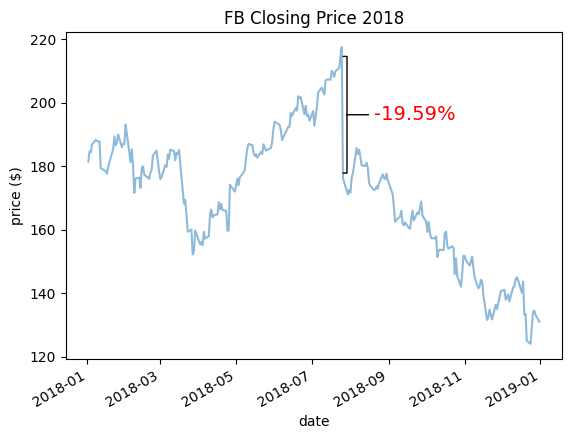

In [12]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price
#
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
#
plt.annotate(
    f'{pct_drop:.2%}', va='center',
    xy=('2018-07-27', (open_price + close_price) / 2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[,widthB=3.0,lengthB=0.2'),
    color='red',
    fontsize=14,
    fontweight='medium'
)
plt.ylabel('price ($)')

Text(0, 0.5, 'PRICE ($)')

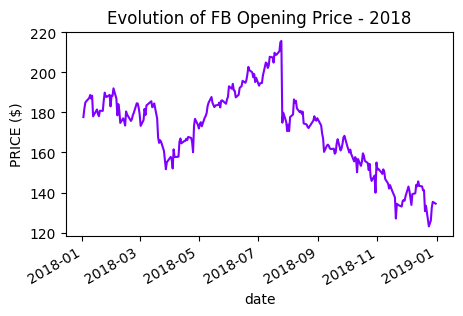

In [13]:
# colors
#
fb.plot(
    y='open',
    figsize=(5, 3),
    color='#8000FF',
    legend=False,
    title='Evolution of FB Opening Price - 2018'
)
plt.ylabel('PRICE ($)')

Text(0, 0.5, 'PRICE ($)')

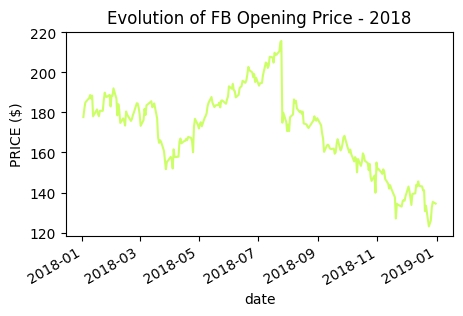

In [16]:
# colors
#
fb.plot(
    y='open',
    figsize=(5, 3),
    color='#CCFF66',
    legend=False,
    title='Evolution of FB Opening Price - 2018'
)
plt.ylabel('PRICE ($)')

Text(0, 0.5, 'PRICE ($)')

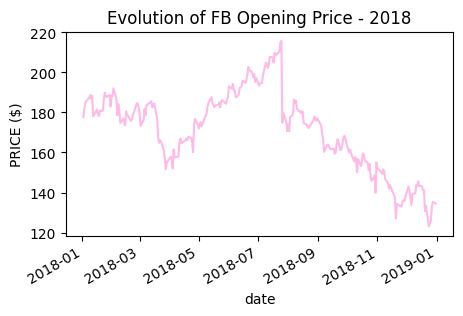

In [19]:
# colors
#
fb.plot(
    y='open',
    figsize=(5, 3),
    color='#FFBAE8',
    legend=False,
    title='Evolution of FB Opening Price - 2018'
)
plt.ylabel('PRICE ($)')

Text(0, 0.5, 'price ($)')

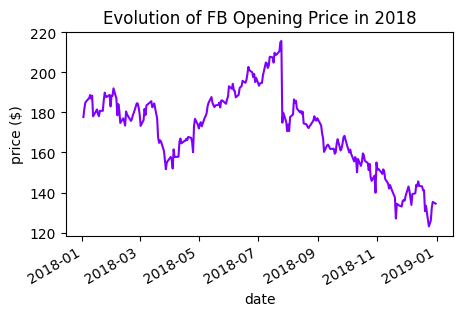

In [20]:
fb.plot(
    y='open',
    figsize=(5, 3),
    color=(128 / 255, 0, 1),
    legend=False,
    title='Evolution of FB Opening Price in 2018'
)
plt.ylabel('price ($)')

In [21]:
from matplotlib import cm
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

Text(0, 0.5, 'price ($)')

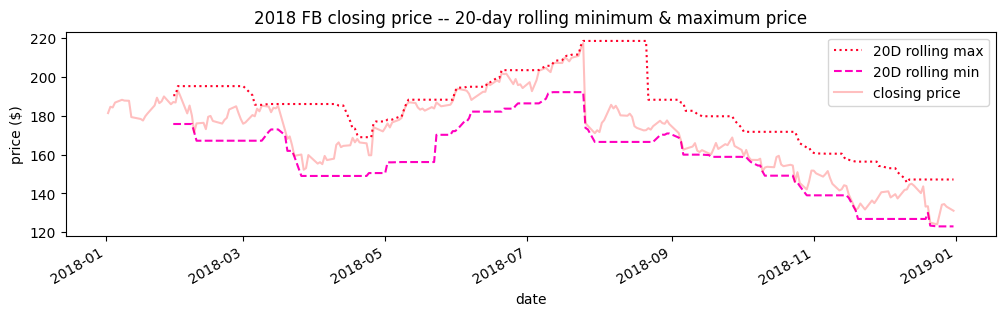

In [28]:
ax = fb.assign(
    rolling_min=lambda x: x.low.rolling(20).min(),
    rolling_max=lambda x: x.high.rolling(20).max()
).plot(
    y=['rolling_max', 'rolling_min'], 
    colormap='gist_rainbow', 
    label=['20D rolling max', '20D rolling min'],
    style=[':', '--'],
    figsize=(12, 3),
    title='2018 FB closing price -- '
          '20-day rolling minimum & maximum price'
)
ax.plot(fb.close, 'red', alpha=0.25, label='closing price')
plt.legend()
plt.ylabel('price ($)')

In [29]:
cm.get_cmap('ocean')(.5)

(0.0, 0.2529411764705882, 0.5019607843137255, 1.0)

In [30]:
# color maps
#
import color_utils

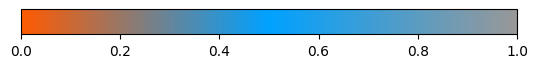

In [32]:
# blend colors 
#
my_colors = ['#FF5A00', '#00A1FF', '#989898']
rgbs = color_utils.hex_to_rgb_color_list(my_colors)
my_cmap = color_utils.blended_cmap(rgbs)
color_utils.draw_cmap(my_cmap, orientation='horizontal')

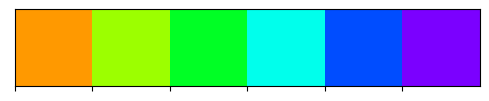

In [33]:
# seaborn color palettes 
#
import seaborn as sns
#
sns.palplot(sns.color_palette("gist_rainbow"))

In [34]:
# interactive color palette 
#
diverging_cmap = sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

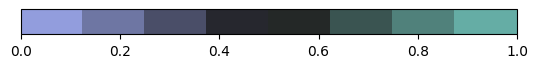

In [35]:
from matplotlib.colors import ListedColormap
color_utils.draw_cmap(ListedColormap(diverging_cmap), orientation='horizontal')

In [36]:
# cycle through colors 
#
import itertools
#
colors = itertools.cycle(['#ffffff', '#f0f0f0', '#000000'])
colors

In [37]:
next(colors)

'#ffffff'

In [38]:
# listed color map 
#
from matplotlib.colors import ListedColormap
red_black = ListedColormap(['red', 'black'], N=2000)
[red_black(i) for i in range(3)]

[(1.0, 0.0, 0.0, 1.0), (0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 1.0)]

In [39]:
def color_generator():
    for year in range(1992, 200019): 
# integers in [1992, 200019)
        if year % 100 == 0 and year % 400 != 0:
# special case (divisible by 100 but not 400)
            color = '#f0f0f0'
        elif year % 4 == 0:
# leap year (divisible by 4)
            color = '#000000'
        else:
            color = '#ffffff'
        yield color
#   
year_colors = color_generator()
year_colors

<generator object color_generator at 0x000001E230054820>

In [40]:
next(year_colors)

'#000000'

In [41]:
# generator 
#
year_colors = (
    '#ffffff'
    if (not year % 100 and year % 400) or year % 4
    else '#000000' for year in range(1992, 200019)
)
year_colors

<generator object <genexpr> at 0x000001E230054BA0>

In [42]:
next(year_colors)

'#000000'

[Text(0.5, 0, 'week number'), Text(0, 0.5, 'volume traded')]

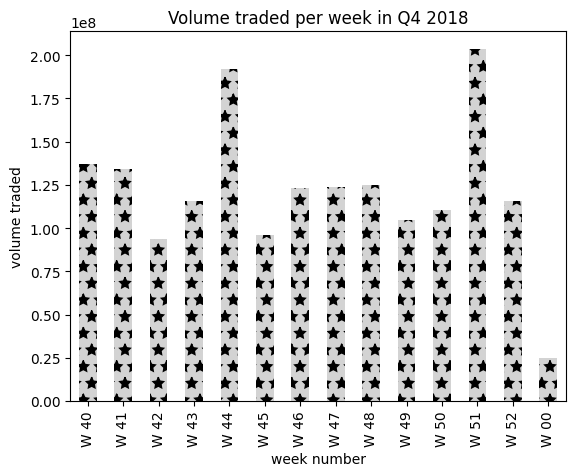

In [43]:
# textures with hatch
#
weekly_volume_traded = fb.loc['2018-Q4'].groupby(pd.Grouper(freq='W')).volume.sum()
weekly_volume_traded.index = weekly_volume_traded.index.strftime('W %W')
ax = weekly_volume_traded.plot(
    kind='bar', hatch='*', color='lightgray',
    title='Volume traded per week in Q4 2018'
)
ax.set(xlabel='week number', ylabel='volume traded')

[Text(0.5, 0, 'week number'), Text(0, 0.5, 'volume traded')]

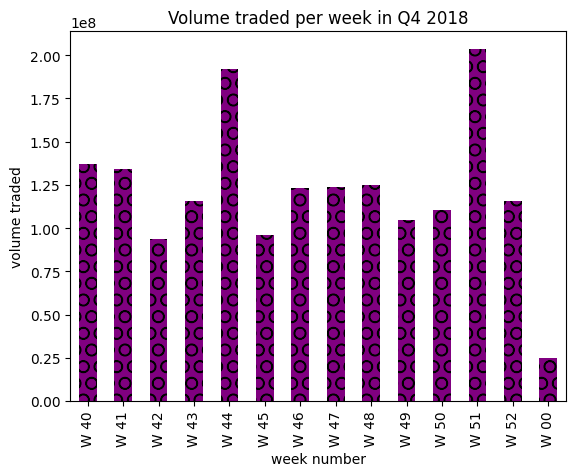

In [44]:
# textures with hatch
#
weekly_volume_traded = fb.loc['2018-Q4'].groupby(pd.Grouper(freq='W')).volume.sum()
weekly_volume_traded.index = weekly_volume_traded.index.strftime('W %W')
ax = weekly_volume_traded.plot(
    kind='bar', hatch='O', color='purple',
    title='Volume traded per week in Q4 2018'
)
ax.set(xlabel='week number', ylabel='volume traded')

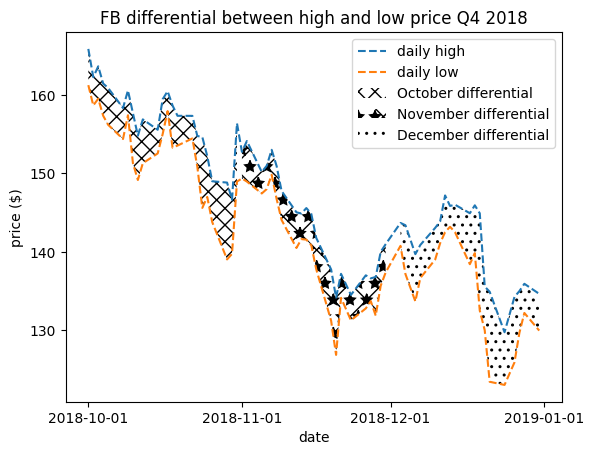

In [45]:
import calendar
#
fb_q4 = fb.loc['2018-Q4']
#
for texture, month in zip(['xx', 'X*', '..'], [10, 11, 12]):
    plt.fill_between(
        fb_q4.index, fb_q4.high, fb_q4.low, hatch=texture, 
        where=fb_q4.index.month == month, facecolor='white',
        label=f'{calendar.month_name[month]} differential'
    )

plt.plot(fb_q4.index, fb_q4.high, '--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, '--', label='daily low')
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.title('FB differential between high and low price Q4 2018')
plt.legend()